# **Evaluation of Supervised Learning Algorithms**

**Author**: Mohammed A. Shehab

---

## **Introduction**

This notebook provides a comprehensive analysis of supervised learning algorithms with a focus on evaluating model performance and addressing common challenges in machine learning workflows. Specifically, the notebook includes:

- **Overfitting Analysis**: Understanding the potential overfitting of the model by comparing training and testing accuracies.
- **Imbalanced Data Handling**: Demonstrating techniques to manage class imbalance, such as using SMOTE.
- **Performance Metrics**: Evaluating model performance using key metrics such as accuracy, precision, recall, F1 score, and AUC.
- **Accuracy vs. Performance Tradeoff**: Analyzing the tradeoff between different metrics across varying thresholds.
- **Visualizations**: Generating ROC curves, confusion matrices, and other plots to better understand model behavior.

This notebook is designed to guide practitioners in evaluating supervised machine learning models effectively and understanding their strengths and limitations under various conditions.


1. **Install imblearn library to handle imbalanced data issue**
2. **Install seaborn library a powerful library for visulization**

In [8]:
# !pip install imbalanced-learn

Matplotlib version: 3.7.1


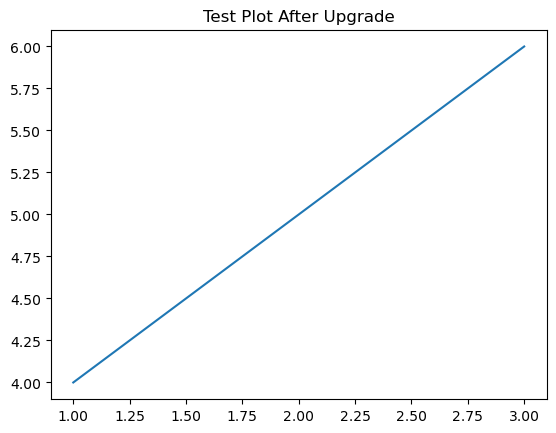

In [1]:
import matplotlib
print("Matplotlib version:", matplotlib.__version__)
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot After Upgrade")
plt.show()

In [2]:
# run command on terminal "conda install seaborn"
import seaborn as sns
from collections import Counter

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

### Generate synthetic dataset

In [4]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, 
    weights=[0.9, 0.1], random_state=42
)

### Split the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Address imbalance using SMOTE

In [6]:
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

In [7]:
# Function to plot class distribution with custom colors
def plot_class_distribution(y, title, ax, colors=None):
    class_counts = Counter(y)
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    # Use default colors if none are provided
    if colors is None:
        colors = sns.color_palette("husl", len(classes))  # Generates unique colors for each class
    
    sns.barplot(x=classes, y=counts, ax=ax, palette=colors)
    ax.set_title(title)
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    ax.bar_label(ax.containers[0])

C:\Users\Shehab\AppData\Local\Temp\ipykernel_2844\3937784727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, ax=ax, palette=colors)
C:\Users\Shehab\AppData\Local\Temp\ipykernel_2844\3937784727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, ax=ax, palette=colors)


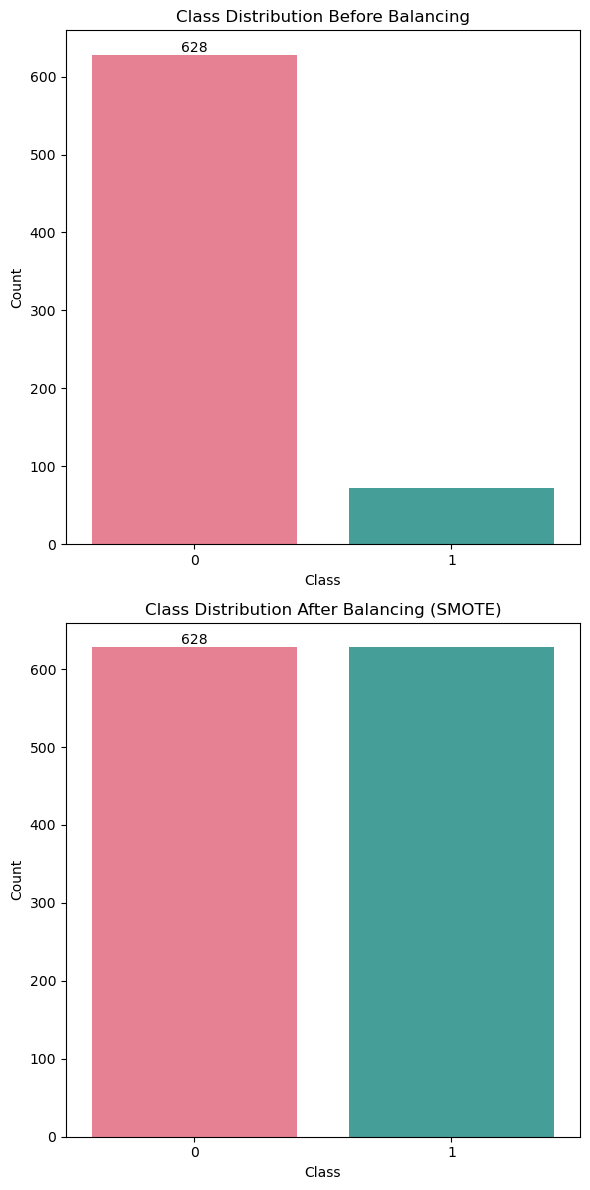

In [8]:
# Plot class distribution before and after balancing
fig, axes = plt.subplots(2, 1, figsize=(6, 12), sharey=True)  # Ensure 2 rows, 1 column

# Before balancing
plot_class_distribution(y_train, "Class Distribution Before Balancing", axes[0])

# After balancing
plot_class_distribution(y_train_balanced, "Class Distribution After Balancing (SMOTE)", axes[1])

plt.tight_layout()
plt.show()

In [9]:
from sklearn.svm import SVC
# Define the SVM model
svm = SVC(probability=True, random_state=42)

In [10]:
# Train the SVM model
svm.fit(X_train_balanced, y_train_balanced)

SVC(probability=True, random_state=42)

In [11]:
# Predictions
y_pred = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)[:, 1]  # Probability for the positive class


In [12]:
# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred_proba)

print("SVM Model Evaluation Metrics:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1 Score: {svm_f1:.2f}")
print(f"AUC: {svm_auc:.2f}")

SVM Model Evaluation Metrics:
Accuracy: 0.93
Precision: 0.65
Recall: 0.71
F1 Score: 0.68
AUC: 0.91


In [13]:
from sklearn.tree import DecisionTreeClassifier
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

In [14]:
# Train the Decision Tree model
dt.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]  # Probability for the positive class



In [15]:
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred_proba)

print("Decision Tree Model Evaluation Metrics:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")
print(f"AUC: {dt_auc:.2f}")

Decision Tree Model Evaluation Metrics:
Accuracy: 0.93
Precision: 0.64
Recall: 0.74
F1 Score: 0.69
AUC: 0.85


 ### ROC Comparison

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

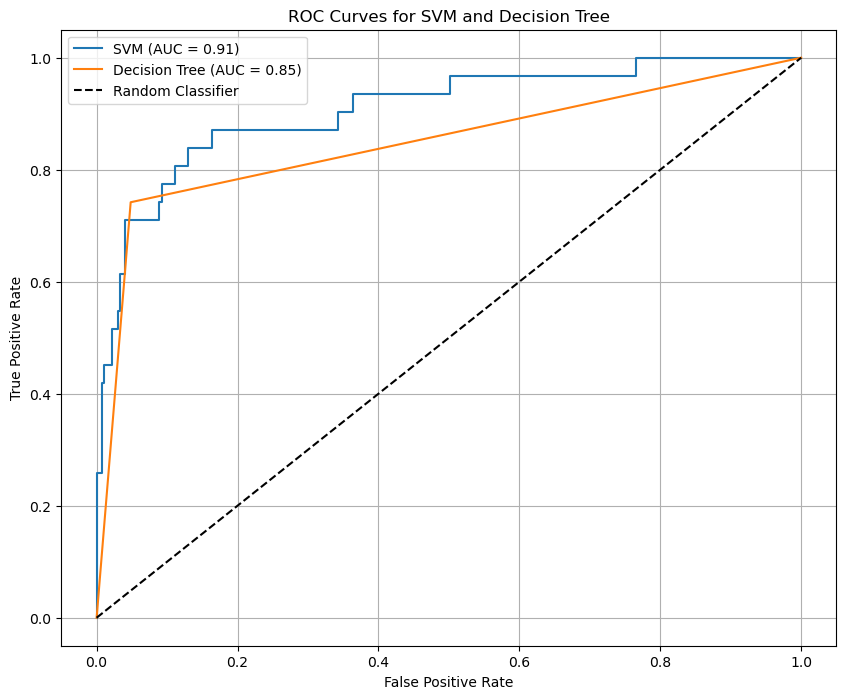

In [17]:
# Models to evaluate
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# Dictionary to store ROC data for each model
roc_data = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Get predictions and probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
    
    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    roc_data[model_name] = (fpr, tpr, auc)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Plot settings
plt.title("ROC Curves for SVM and Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

## Overfitting with Visualization

In [18]:
# Arrays to store training and testing F1 scores
train_f1_scores = []
test_f1_scores = []

In [19]:
# Varying model complexity by changing max_depth
max_depth_range = range(1, 21)

for max_depth in max_depth_range:
    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train_balanced, y_train_balanced)
    
    # Evaluate F1 scores on training and testing data
    y_train_pred = model.predict(X_train_balanced)
    y_test_pred = model.predict(X_test)
    
    train_f1_scores.append(f1_score(y_train_balanced, y_train_pred))
    test_f1_scores.append(f1_score(y_test, y_test_pred))

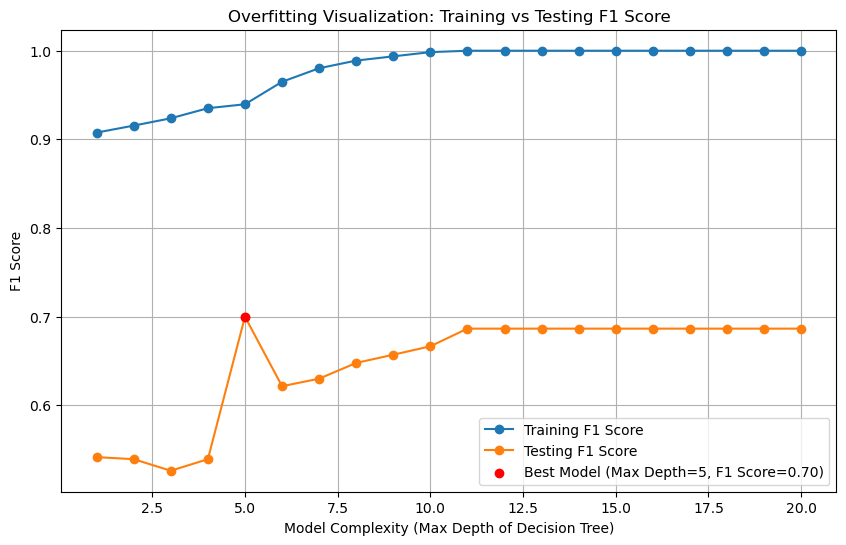

In [20]:
# Find the best model based on the highest testing F1 score
best_index = np.argmax(test_f1_scores)
best_max_depth = max_depth_range[best_index]
best_test_f1_score = test_f1_scores[best_index]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_f1_scores, label="Training F1 Score", marker="o")
plt.plot(max_depth_range, test_f1_scores, label="Testing F1 Score", marker="o")

# Highlight the best model
plt.scatter(
    best_max_depth, best_test_f1_score, color="red", 
    label=f"Best Model (Max Depth={best_max_depth}, F1 Score={best_test_f1_score:.2f})", zorder=5
)

plt.xlabel("Model Complexity (Max Depth of Decision Tree)")
plt.ylabel("F1 Score")
plt.title("Overfitting Visualization: Training vs Testing F1 Score")
plt.legend()
plt.grid()
plt.show()


# **Visualizing Overfitting in a Decision Tree Model**

## **What This Code Does**

### **1. Model Complexity**
- The complexity of the Decision Tree is controlled by the `max_depth` parameter.
- Shallow trees (`max_depth=1`) are underfitted, while deeper trees (`max_depth > optimal`) tend to overfit.

### **2. Accuracy Tracking**
- The training and testing accuracy are evaluated for each value of `max_depth`.

### **3. Visualization**
- Training accuracy increases with model complexity but eventually plateaus.
- Testing accuracy increases initially and then decreases, showing the **overfitting effect**.

---


## Overfitting Visualization for SVM


In [44]:
# Arrays to store training and testing F1 scores for each C
svm_train_f1_scores = []
svm_test_f1_scores = []
# Varying C and gamma values
svm_C_range = np.logspace(-3, 3, 10)  # 10 values of C from 0.001 to 1000 (log scale)
svm_gamma_range = np.logspace(-3, 2, 5)  # 5 values of gamma from 0.001 to 100 (log scale)

# Dictionary to store the best gamma for each C
best_gamma_for_C = {}

In [45]:
# Store results for heatmap visualization
# heatmap_data = np.zeros((len(svm_gamma_range), len(svm_C_range)))

In [46]:
for svm_C in svm_C_range:
    best_test_f1 = -1
    best_train_f1 = -1
    best_gamma = None
    
    for svm_gamma in svm_gamma_range:
        # Create and train the SVM model
        svm_model = SVC(C=svm_C, gamma=svm_gamma, kernel='rbf', probability=True, random_state=42)
        svm_model.fit(X_train_balanced, y_train_balanced)
        
        # Evaluate F1 scores
        y_train_pred = svm_model.predict(X_train_balanced)
        y_test_pred = svm_model.predict(X_test)
        
        train_f1 = f1_score(y_train_balanced, y_train_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        
        # Update the best gamma for this C
        if test_f1 > best_test_f1:
            best_test_f1 = test_f1
            best_train_f1 = train_f1
            best_gamma = svm_gamma

    # Store the best gamma and corresponding F1 scores for this C
    best_gamma_for_C[svm_C] = (best_gamma, best_train_f1, best_test_f1)
    svm_train_f1_scores.append(best_train_f1)
    svm_test_f1_scores.append(best_test_f1)


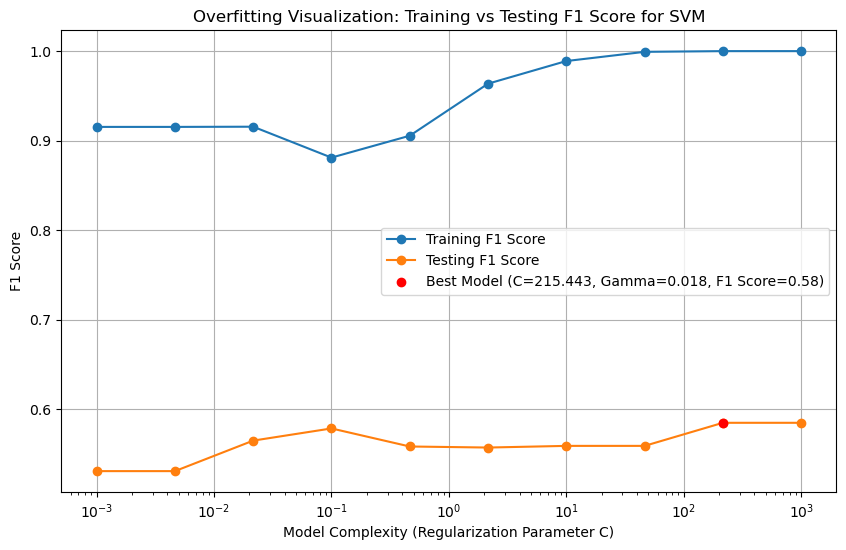

In [47]:
# Find the best model based on the highest testing F1 score
svm_best_index = np.argmax(svm_test_f1_scores)
svm_best_C = svm_C_range[svm_best_index]
svm_best_gamma = best_gamma_for_C[svm_best_C][0]
svm_best_test_f1_score = svm_test_f1_scores[svm_best_index]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(svm_C_range, svm_train_f1_scores, label="Training F1 Score", marker="o")
plt.plot(svm_C_range, svm_test_f1_scores, label="Testing F1 Score", marker="o")

# Highlight the best model
plt.scatter(
    svm_best_C, svm_best_test_f1_score, color="red", 
    label=f"Best Model (C={svm_best_C:.3f}, Gamma={svm_best_gamma:.3f}, F1 Score={svm_best_test_f1_score:.2f})", zorder=5
)

plt.xscale("log")  # Logarithmic scale for C
plt.xlabel("Model Complexity (Regularization Parameter C)")
plt.ylabel("F1 Score")
plt.title("Overfitting Visualization: Training vs Testing F1 Score for SVM")
plt.legend()
plt.grid()
plt.show()